In [113]:
from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt
from narcos.kiva_data import KivaData
import requests
from narcos.fixer_config import access_key
import json
import numpy as np


In [114]:
from narcos.kiva_data import KivaData
from forex_python.converter import CurrencyRates
from functools import partial
import seaborn as sns

In [115]:
kiva_data = KivaData(use_sample=True)
df = kiva_data.loan_data

df.head(1)

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender,funded_amount_usd,loan_amount_usd
0,6883,264956,912251,575.0,975.0,Grocery Store,Food,"to buy more products such as meats, sausages, ...",HN,Honduras,...,NaT,20.0,19,"user_favorite, #Single, #Supporting Family",male,monthly,2015-07-02,male,575.0,975.0


In [116]:
def plot_country_by_loan_amount():
    country_df = df[['country','loan_amount']].groupby("country").sum()
    country_df['loan_ranked'] = df[['country','loan_amount']].groupby("country").sum().rank(ascending=True)
    country_df_filtered = country_df[country_df['loan_ranked'] <20]
    #c = country_df.groupby("country").agg('sum')[['loan_amount']]/100000
    country_df_filtered.reset_index(inplace=True)
    print(country_df_filtered)

    country_df_filtered.plot.bar(x='country',y='loan_amount', color=['b','r', 'y','g','c', 'silver','m','k'], align='center',figsize=(20,4))

    plt.title("Country / Loan Plot")
    plt.xlabel("Country Name")
    plt.ylabel("Loan Amount")
    plt.savefig("CountryByLoan"+".png")
    #plt.show()

            country  loan_amount  loan_ranked
0            Belize       1375.0          2.0
1             Benin       3925.0          4.0
2            Brazil       5475.0         11.0
3          Cameroon       9350.0         17.0
4             China       4750.0          8.0
5             Congo       8600.0         15.0
6            Israel      12825.0         18.0
7           Lesotho       7925.0         14.0
8           Moldova       5700.0         13.0
9             Nepal       4150.0          5.0
10           Panama       4200.0          6.0
11      Puerto Rico       5525.0         12.0
12  Solomon Islands       4500.0          7.0
13          Somalia       1500.0          3.0
14     South Africa       9125.0         16.0
15      South Sudan        825.0          1.0
16         Suriname       4900.0          9.0
17         Thailand       5300.0         10.0
18           Turkey      13675.0         19.0


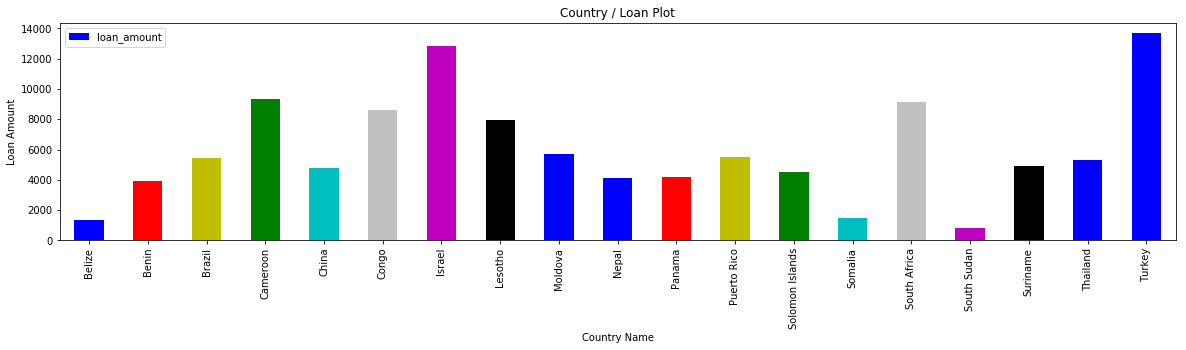

In [117]:
plot_country_by_loan_amount()

In [118]:
def loans_by_gender(df):
    df.groupby('gender').agg('count')[['loan_amount']].plot.pie(y='loan_amount')
    #plt.show()

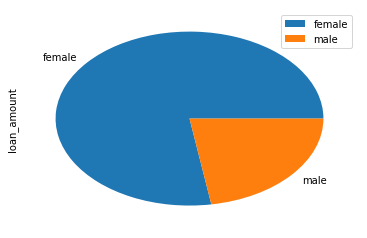

In [119]:
loans_by_gender(df)

In [125]:
def plot_sector_by_loan_amount():
    sector_df = df[['sector','loan_amount']].groupby("sector").sum()
    sector_df['loan_ranked'] = df[['sector','loan_amount']].groupby("sector").sum().rank(ascending=True)
    sector_df_filtered = sector_df[sector_df['loan_ranked'] <20]
    #c = country_df.groupby("country").agg('sum')[['loan_amount']]/100000
    sector_df_filtered.reset_index(inplace=True)
    print(sector_df_filtered)

    sector_df_filtered.plot.bar(x='sector',y='loan_amount', color=['g'], align='center',figsize=(20,4))

    plt.title("Sector / Loan Plot")
    plt.xlabel("Sector Name")
    plt.ylabel("Loan Amount")
    plt.savefig("SectorByLoan"+".png")
    #plt.show()

            sector  loan_amount  loan_ranked
0      Agriculture    2128075.0         15.0
1             Arts     167250.0          7.0
2         Clothing     542100.0         11.0
3     Construction      98175.0          4.0
4        Education     435625.0         10.0
5    Entertainment      17775.0          2.0
6             Food    1803925.0         14.0
7           Health     138550.0          5.0
8          Housing     347800.0          9.0
9    Manufacturing      96025.0          3.0
10    Personal Use     227150.0          8.0
11          Retail    1358775.0         13.0
12        Services     736750.0         12.0
13  Transportation     161950.0          6.0
14       Wholesale      17050.0          1.0


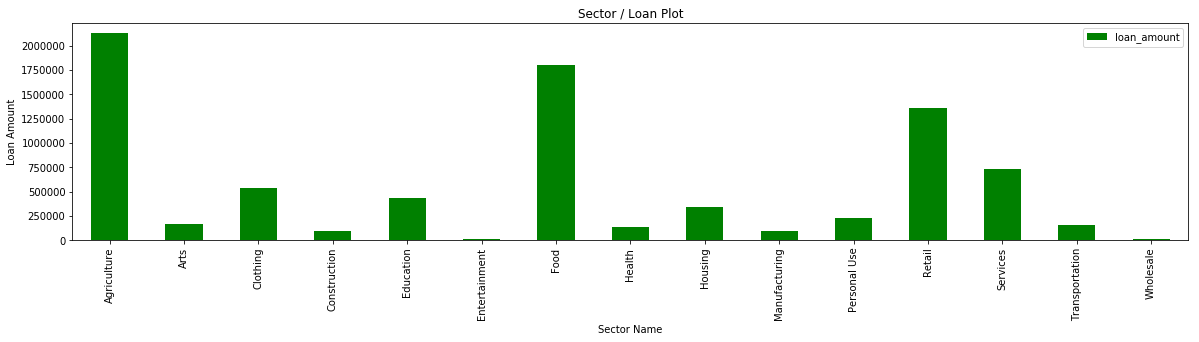

In [126]:
plot_sector_by_loan_amount()